In [25]:
%cd ..
import layers
from utils import *
from tqdm import tqdm

/home/daniil_artamonov


## Инициализируем топологию
Параметры можно изменять в `topology_params`

In [26]:
topology_params = {'amount_neurons': 100, 'k_neighbours': 5,
                   'probability': 0.6, 'dtau': 0.1}

hidden_layer = layers.IntraConnectLayer(**topology_params)
hidden_layer.from_edges()

Количество двойных связей:  10.0


## Информация о топологии
У класса `IntraConnectLayer` есть 2 метода с помощью которых можно узнать как выглядит топология.

1) `IntraConnectLayer.draw_graph()` - граф связности (ничего не видно при количестве нейронов > 100). Параметры отрисовки можно изменить в родительском классе `HiddenLayer`
2) `IntraConnectLayer.get_connevtivity` - возвращает `pd.DataFrame` с информацией о связности нейронов (по факту - матрица весов)

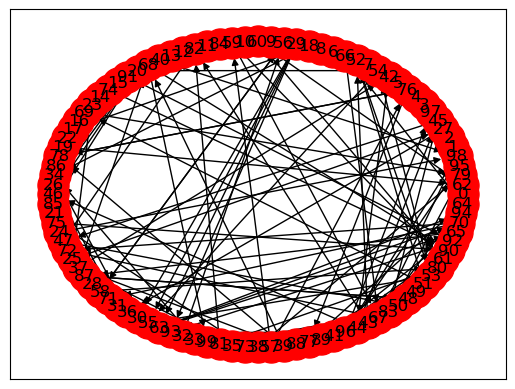

In [27]:
hidden_layer.draw_graph()

In [28]:
hidden_layer.get_connectivity()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,250.0,0.0
1,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0
3,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,250.0,250.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,250.0,0.0
97,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Создаем серию входных спайков
Доступно несколько видов входных серий, выбрать другие можно изменив значение `'version'` в `generator_params`

In [29]:
generator_params = {'steps': 5000, 'version': '2'}

input_spikes = spike_generator(n=topology_params.get('amount_neurons'), **generator_params)

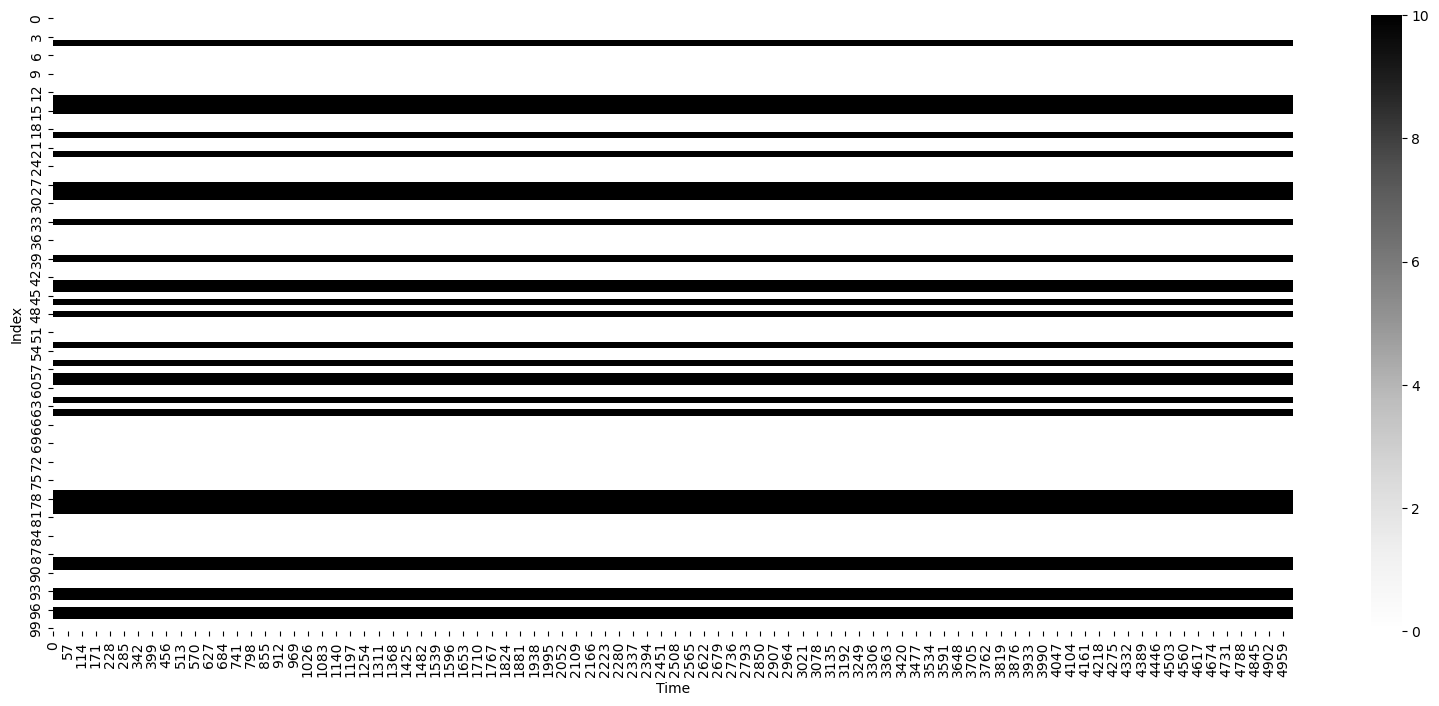

In [30]:
plot_inputs(input_spikes)

## Цикл обучения

In [31]:
df = create_df(topology_params.get('amount_neurons'))  # Создаем датафрейм для сохранения результатов эпохи

In [32]:
for i in tqdm(range(len(input_spikes)), ascii=True, desc='forward'):
    out, mem = hidden_layer.intra_forward(input_spikes[i])  # Считаем выходные спайки и мембранный потенциал
    df.loc[len(df.index)] = input_spikes[i].tolist() + mem + out.tolist()  # Сохраняем в датафрейм

forward: 100%|##########| 5000/5000 [00:11<00:00, 443.29it/s]


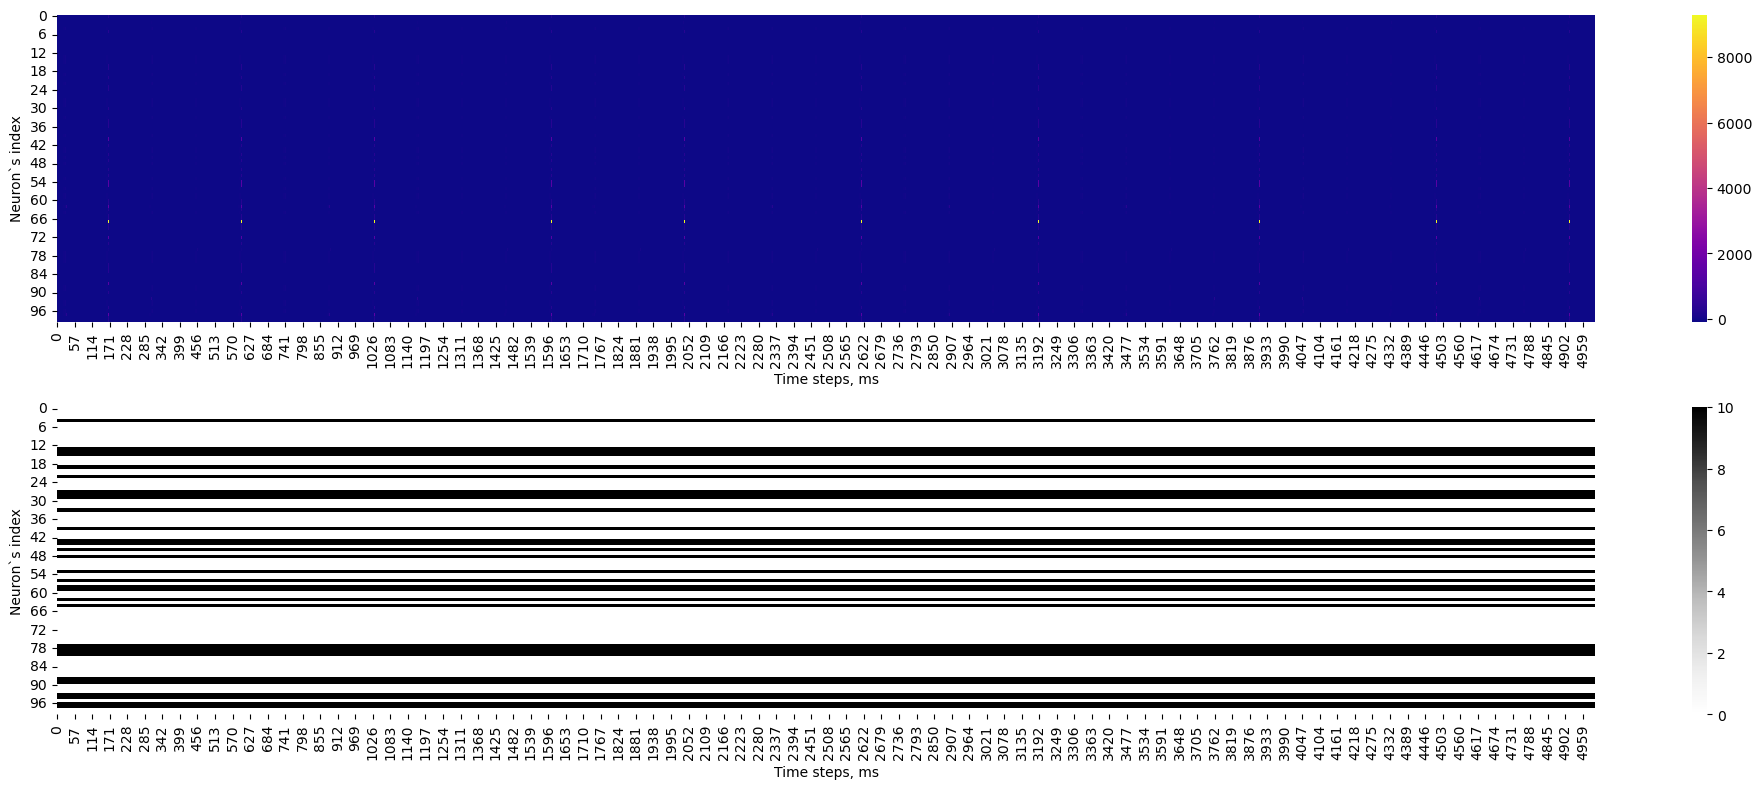

In [33]:
plot_heatmap(df)

In [34]:
df['out_spike_8'].value_counts()

out_spike_8
0.0    5000
Name: count, dtype: int64

Почему не работает?

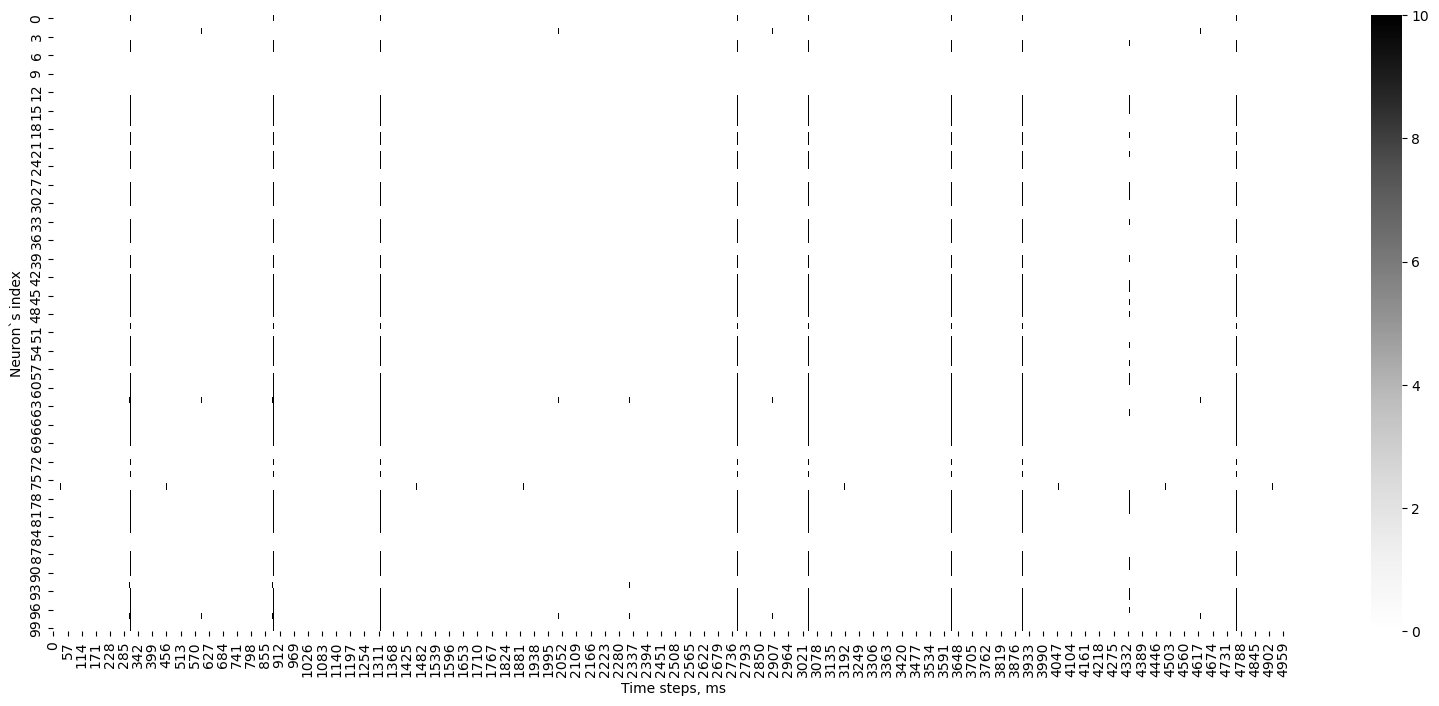

In [35]:
plot_outputs(df=df)

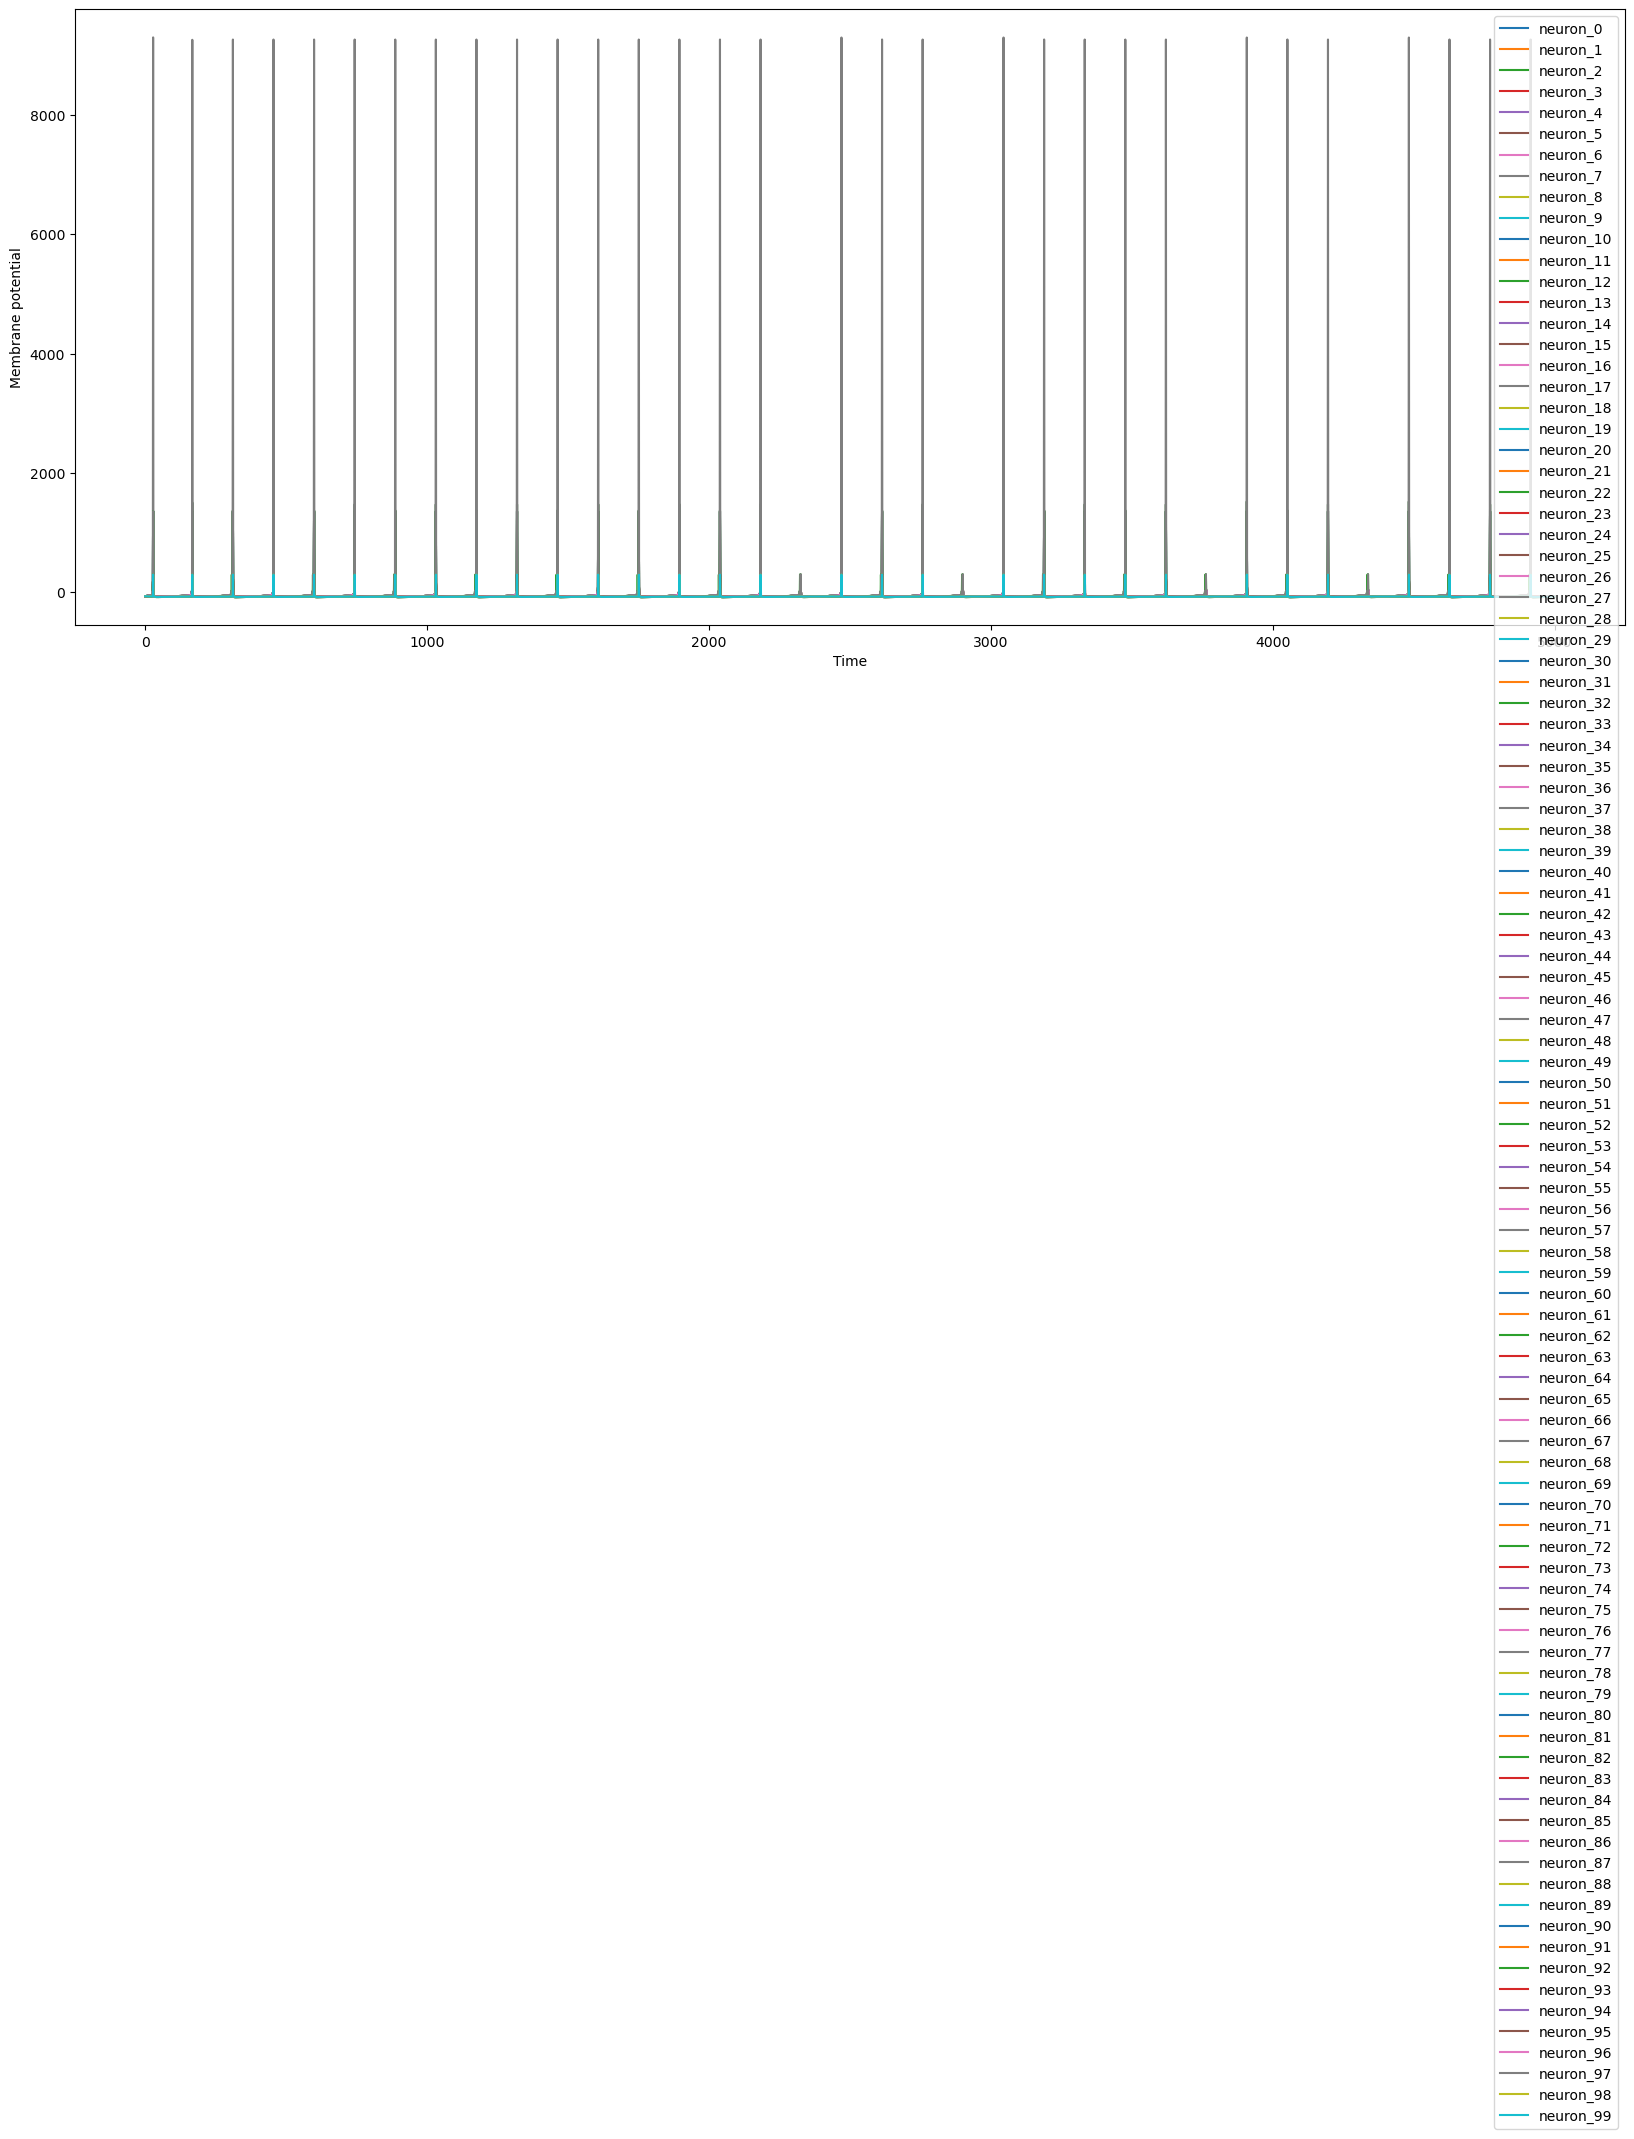

In [36]:
plot_mem(df=df)